# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#3.-Downloading-and-Installing-Prerequisite)
* [3. Downloading the Dataset](#4.-Downloading-the-Dataset)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''


'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2174,2179,2181,2191,2191,2191,2191,2237,2244,2244
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1164,1170,1174,1181,1181,1190,1193,1199,1210,1217
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2737,2745,2751,2756,2762,2769,2772,2777,2782,2786
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,83,84,84,84,84,84,84,84,84,84
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,403,403,405,405,405,407,408,408,410,413


In [6]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41441,41543,41612,41727,41727,41727,41727,42530,42666,42666
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,32122,32700,33185,33634,33634,34353,34648,34996,35551,36102
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,66214,66550,66855,67127,67395,67611,67808,67999,68185,68383
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7318,7360,7384,7432,7463,7463,7517,7548,7585,7615
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,10354,10627,10859,11044,11146,11189,11223,11266,11376,11477


#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [7]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    total_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)


In [8]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  87186540
Total death cases:  1883761
Total recoveries cases:  48777336
Total active cases:  36525443


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

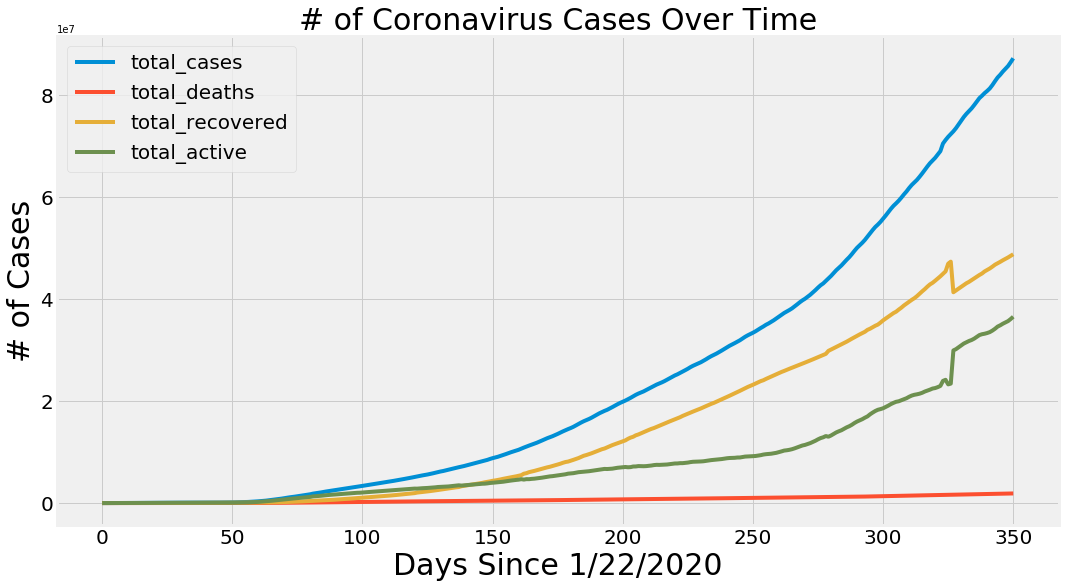

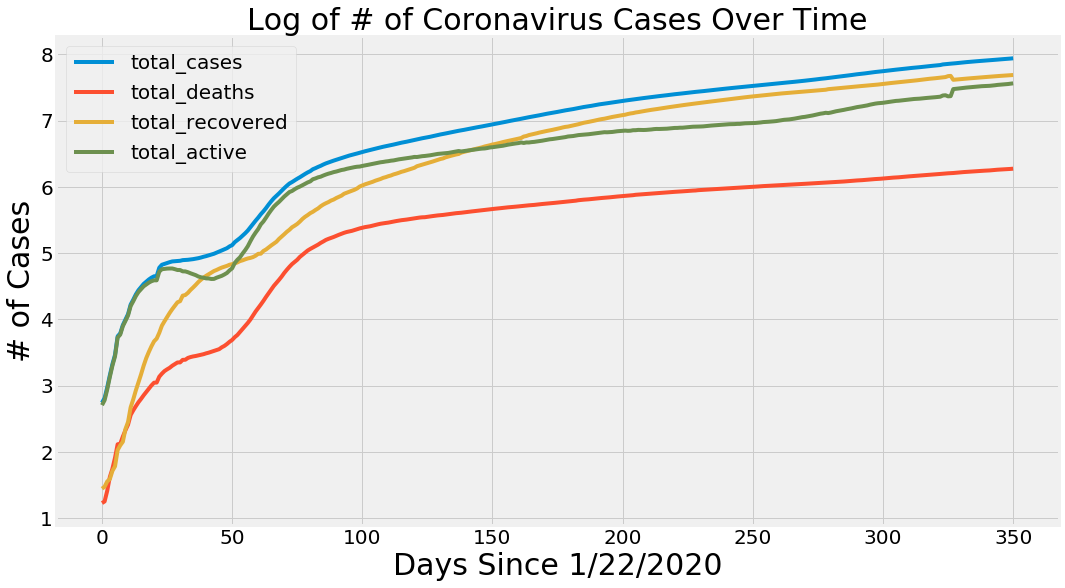

In [9]:
#Insert your code here:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_cases)
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(total_cases))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.plot(adjusted_dates, np.log10(total_active))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

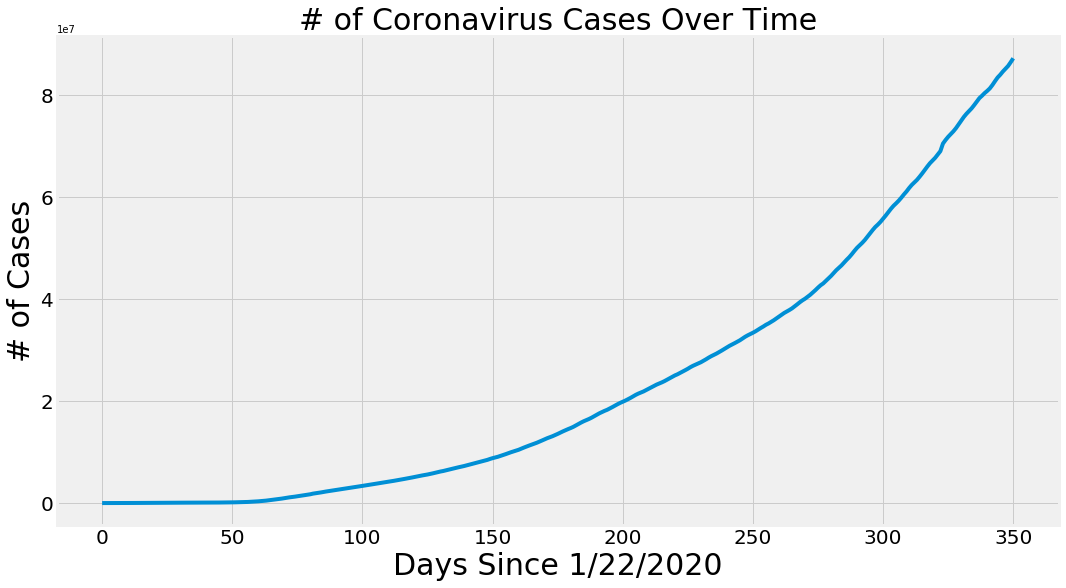

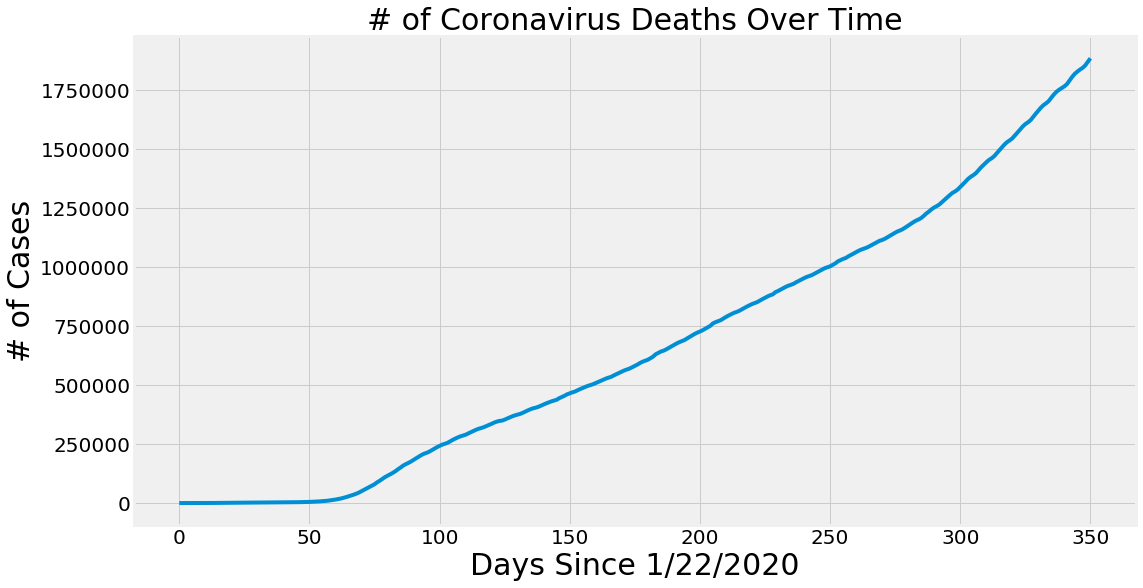

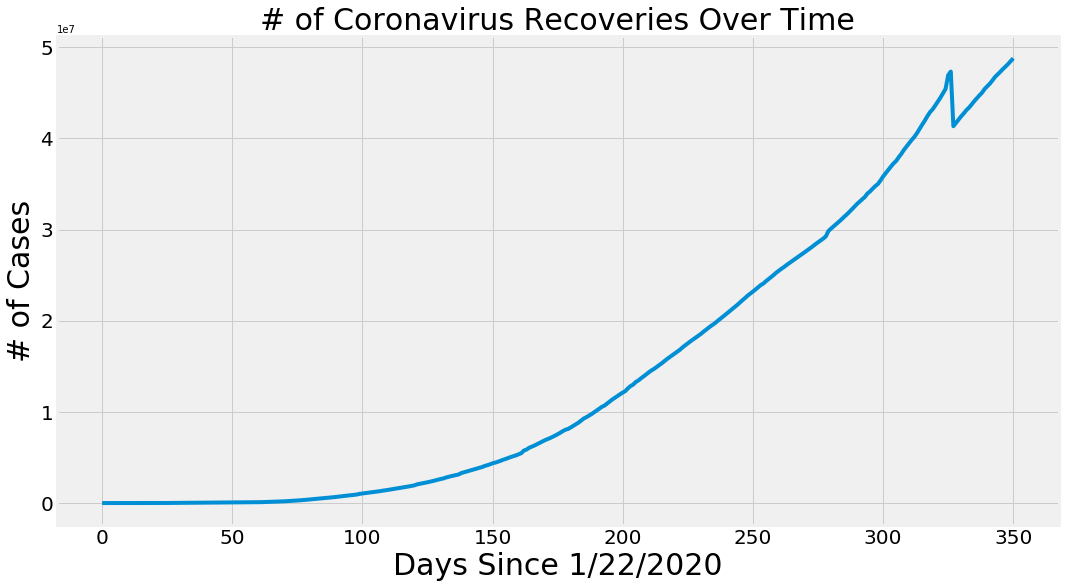

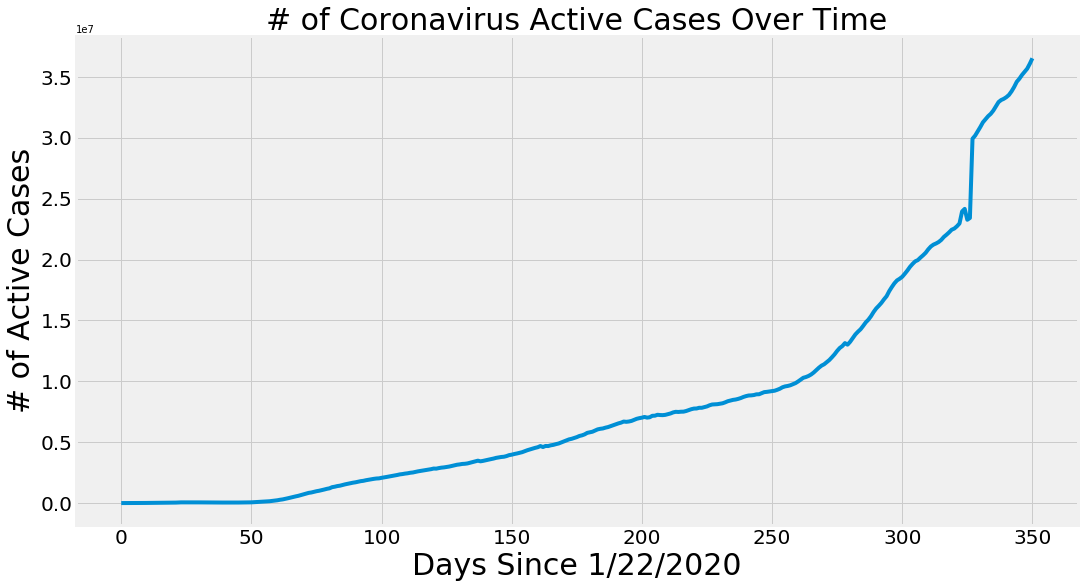

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [11]:
#Insert your code here
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
world_daily_increase = daily_increase(total_cases)

# deaths
world_daily_death = daily_increase(total_deaths)

# recoveries
world_daily_recovery = daily_increase(total_recovered)

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

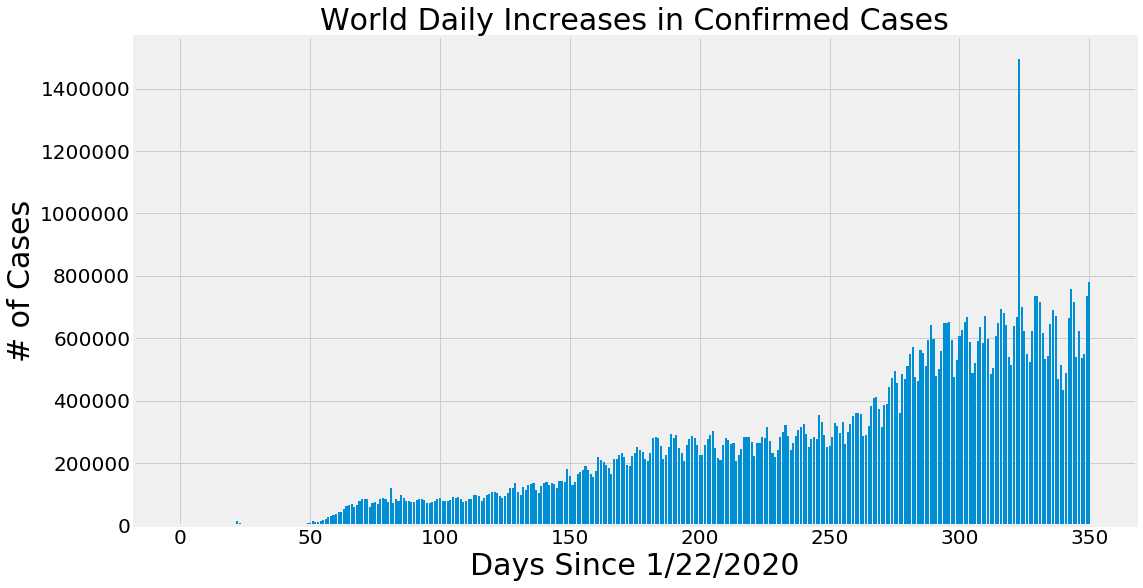

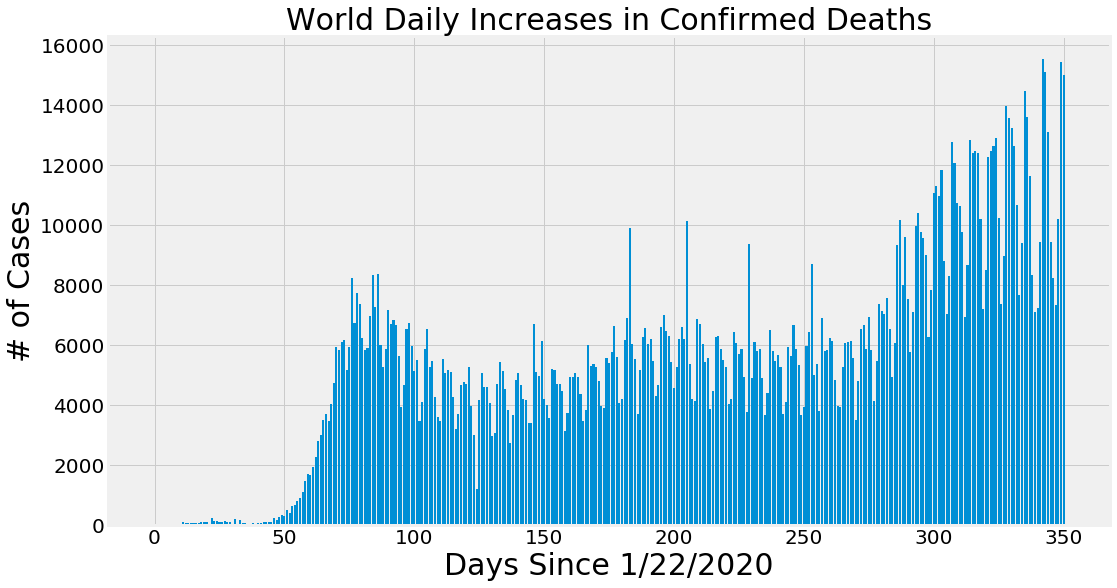

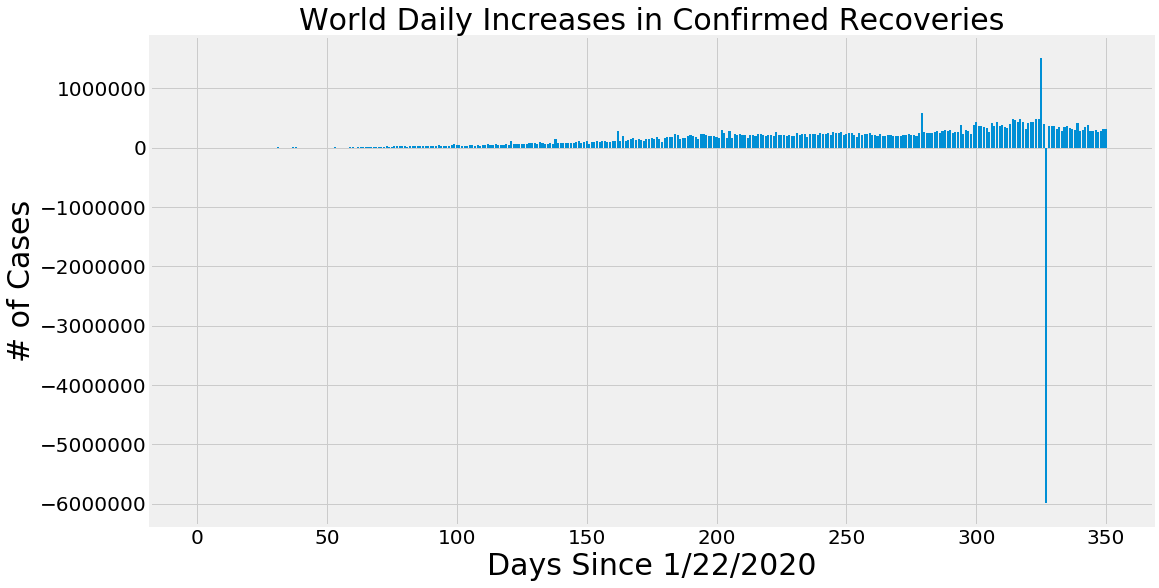

In [12]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [13]:
#Insert your code here:
mortality_rate = []
recovery_rate = [] 
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    mortality_rate.append(death_sum/confirmed_sum * 100)
    recovery_rate.append(recovered_sum/confirmed_sum * 100)

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

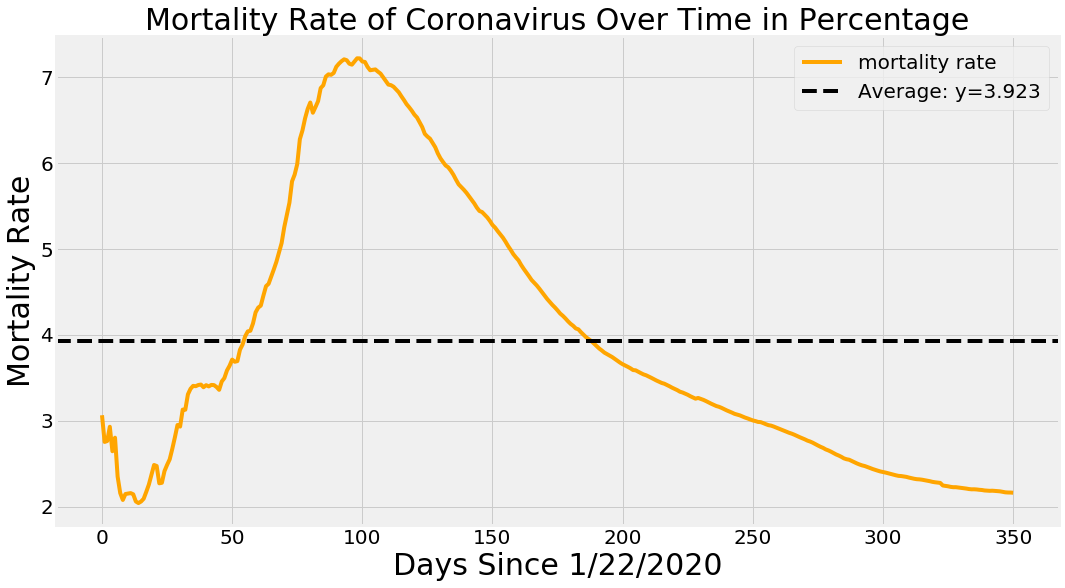

In [14]:
#Insert your code here:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time in Percentage', size=30)
plt.legend(['mortality rate', 'Average: y='+str(round(mean_mortality_rate, 3))], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

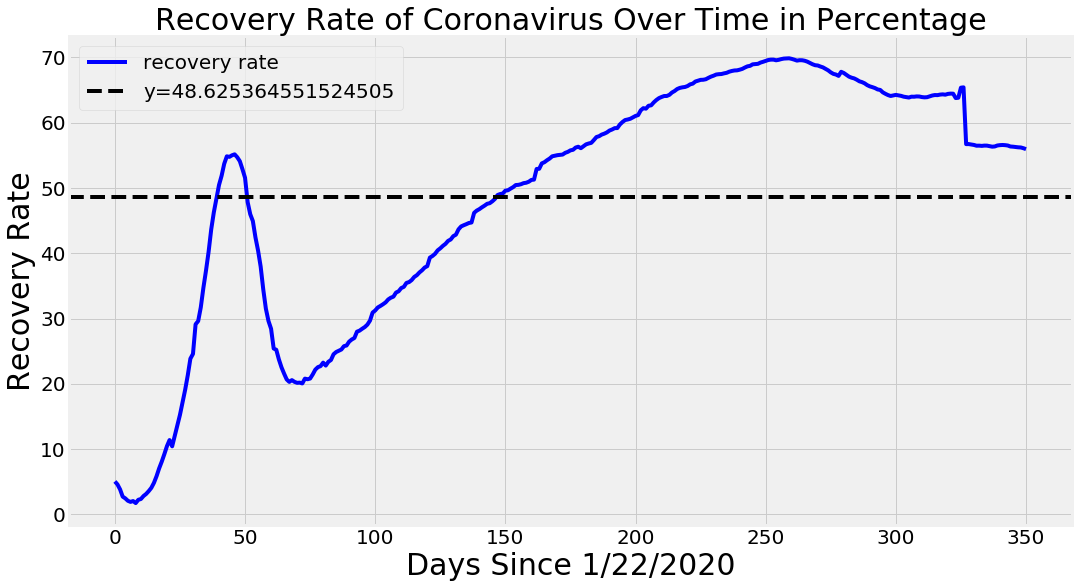

In [15]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time in Percentage', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#  4. Continent Analysis

## Data Prerocessing

In [16]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [17]:
#Insert your code here:
confirmed_df.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
deaths_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
recoveries_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries2[:]])
confirmed_df.head()

,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864


# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [18]:
#Insert your code here:
countries_df = confirmed_df.groupby('Country/Region').mean()[['Lat', 'Long']]
countries_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries_df.index])
countries_df['Confirmed'] = confirmed_df.groupby('Country/Region').sum().iloc[:,-1]
countries_df['Deaths'] = deaths_df.groupby('Country/Region').sum().iloc[:,-1]
countries_df['Recoveries'] = recoveries_df.groupby('Country/Region').sum().iloc[:,-1]
countries_df['Active'] = countries_df['Confirmed'] - countries_df['Recoveries'] - countries_df['Deaths']
countries_df['Mortality Rate'] = round(countries_df['Deaths']/countries_df['Confirmed'] * 100, 2)
countries_df.head()

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,,,
Afghanistan,33.93911,67.709953,Asia,53105,2244,42666,8195,4.23
Albania,41.15330,20.168300,Europe,61008,1217,36102,23689,1.99
Algeria,28.03390,1.659600,Africa,101120,2786,68383,29951,2.76
Andorra,42.50630,1.521800,Europe,8348,84,7615,649,1.01
Angola,-11.20270,17.873900,Africa,17864,413,11477,5974,2.31


# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [19]:
#Insert your code here:
continents_df = countries_df.copy().drop(['Lat', 'Long'], axis = 1).groupby(["continent"]).sum()
continents_df["Mortality Rate"] = np.round(100*continents_df["Deaths"]/continents_df["Confirmed"],2)
continents_df.head()

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,2914291,69858,2392331,452102,2.40
Asia,20927236,340201,19448685,1138350,1.63
Australia,31610,945,28722,1943,2.99
Europe,25013345,569949,12020893,12422503,2.28
North America,24410139,527390,2423739,21459010,2.16


In [20]:
continents_df = countries_df.drop(['Lat', 'Long'], axis = 1).groupby(["continent"]).sum()

In [21]:
countries_df

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,,,
Afghanistan,33.939110,67.709953,Asia,53105,2244,42666,8195,4.23
Albania,41.153300,20.168300,Europe,61008,1217,36102,23689,1.99
Algeria,28.033900,1.659600,Africa,101120,2786,68383,29951,2.76
Andorra,42.506300,1.521800,Europe,8348,84,7615,649,1.01
Angola,-11.202700,17.873900,Africa,17864,413,11477,5974,2.31
Antigua and Barbuda,17.060800,-61.796400,North America,163,5,149,9,3.07
Argentina,-38.416100,-63.616700,South America,1676171,43976,1474048,158147,2.62
Armenia,40.069100,45.038200,Asia,160853,2890,146576,11387,1.80
Australia,-32.106275,141.355487,Australia,28546,909,25810,1827,3.18


## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [22]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

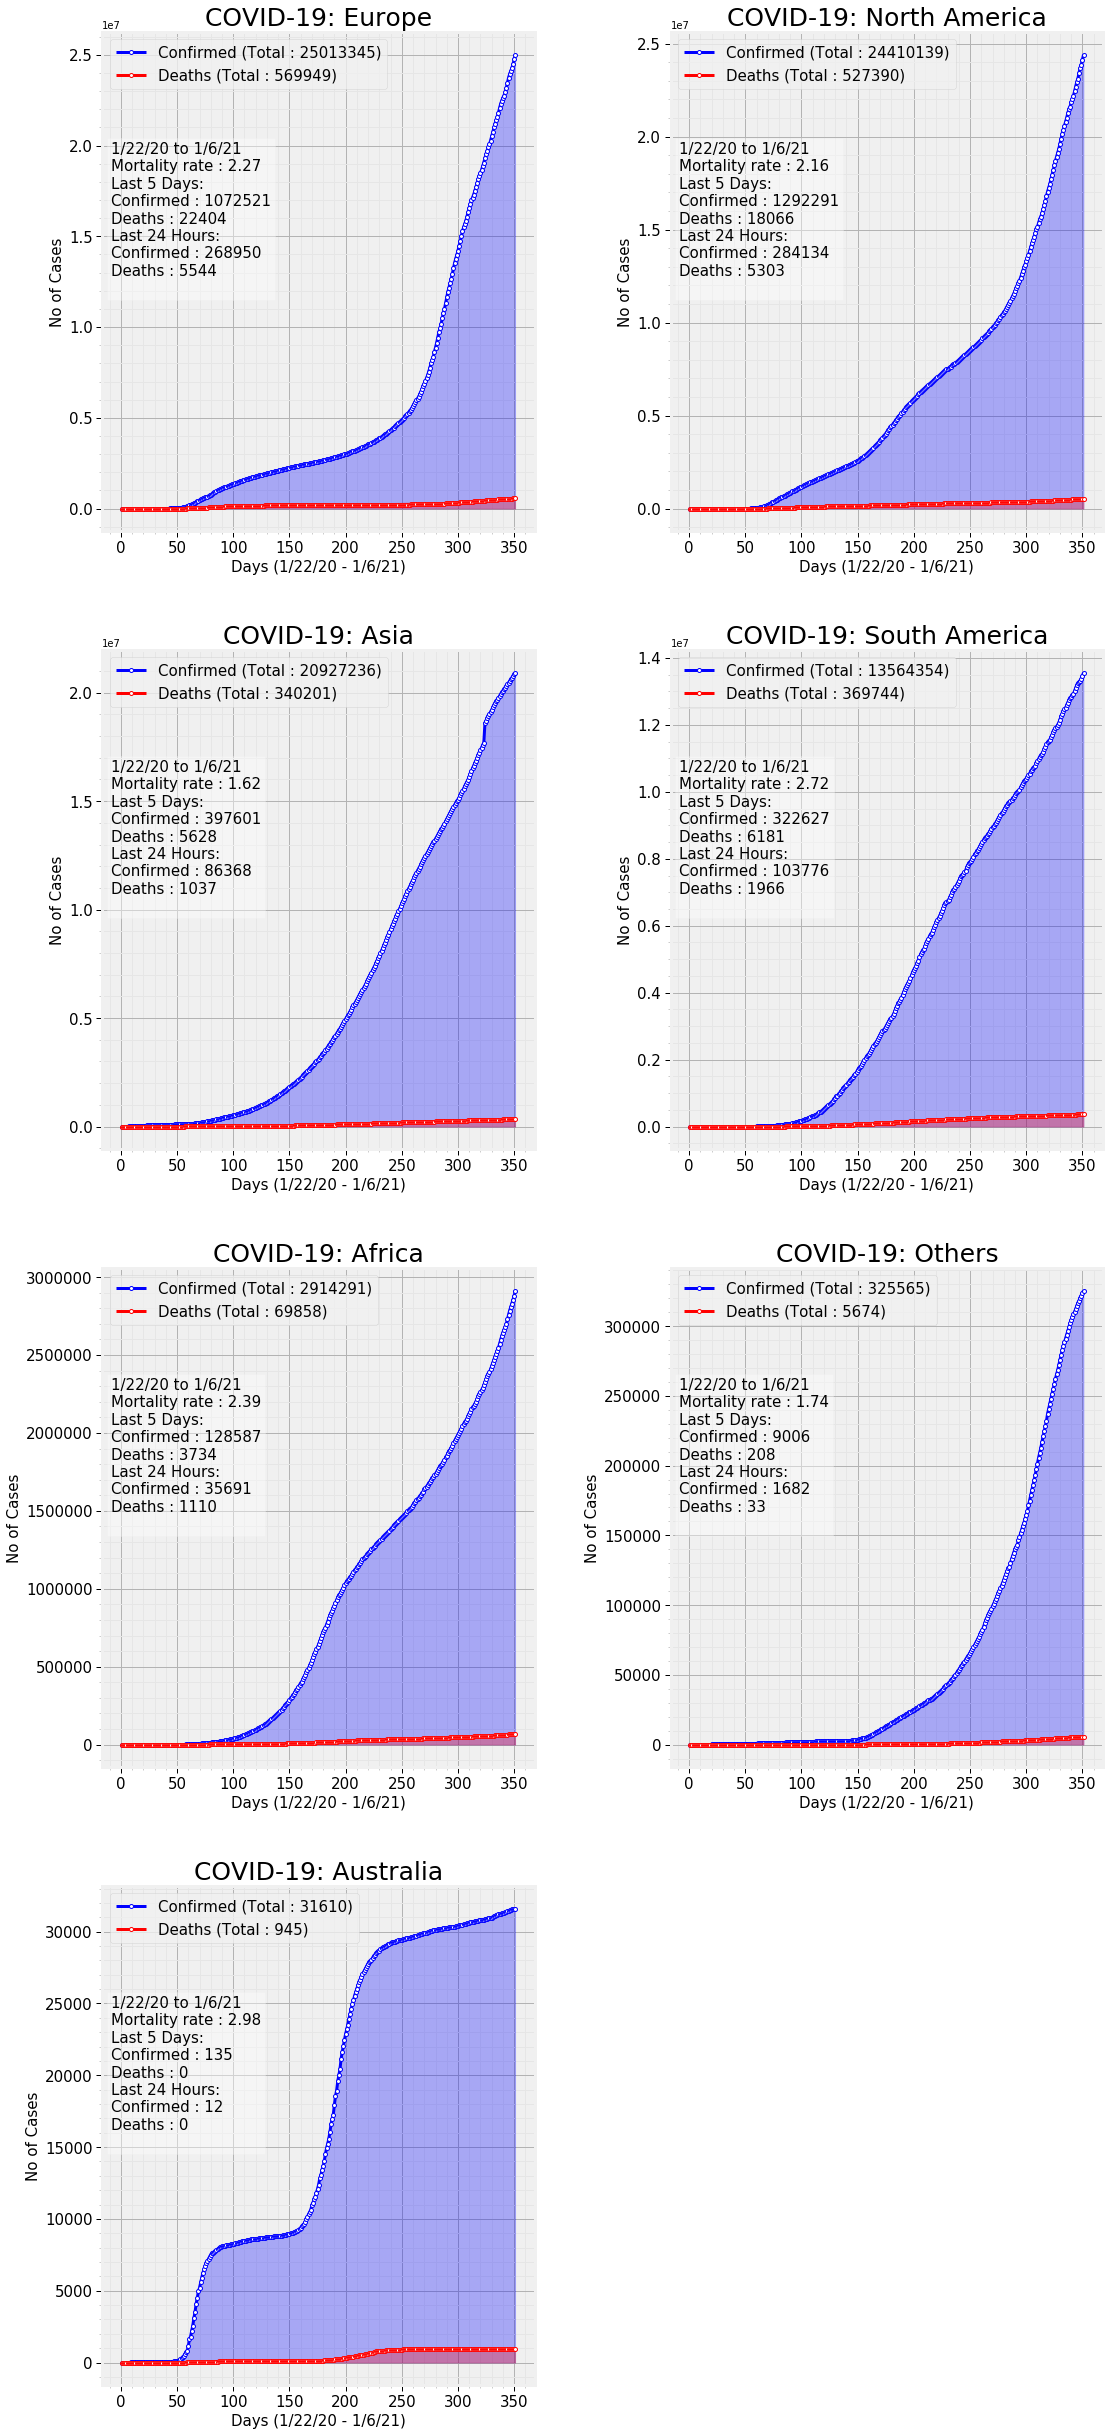

In [23]:
# Insert your code here:
continents = continents_df.sort_values(continents_df.columns[0],ascending = False).index
#print(continents)
cols =2
rows = int(np.ceil(len(continents)/cols))
f = plt.figure(figsize=(18,9*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(confirmed_df, deaths_df, continent = continent,figure = [f,rows,cols, i+1])
plt.show()


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

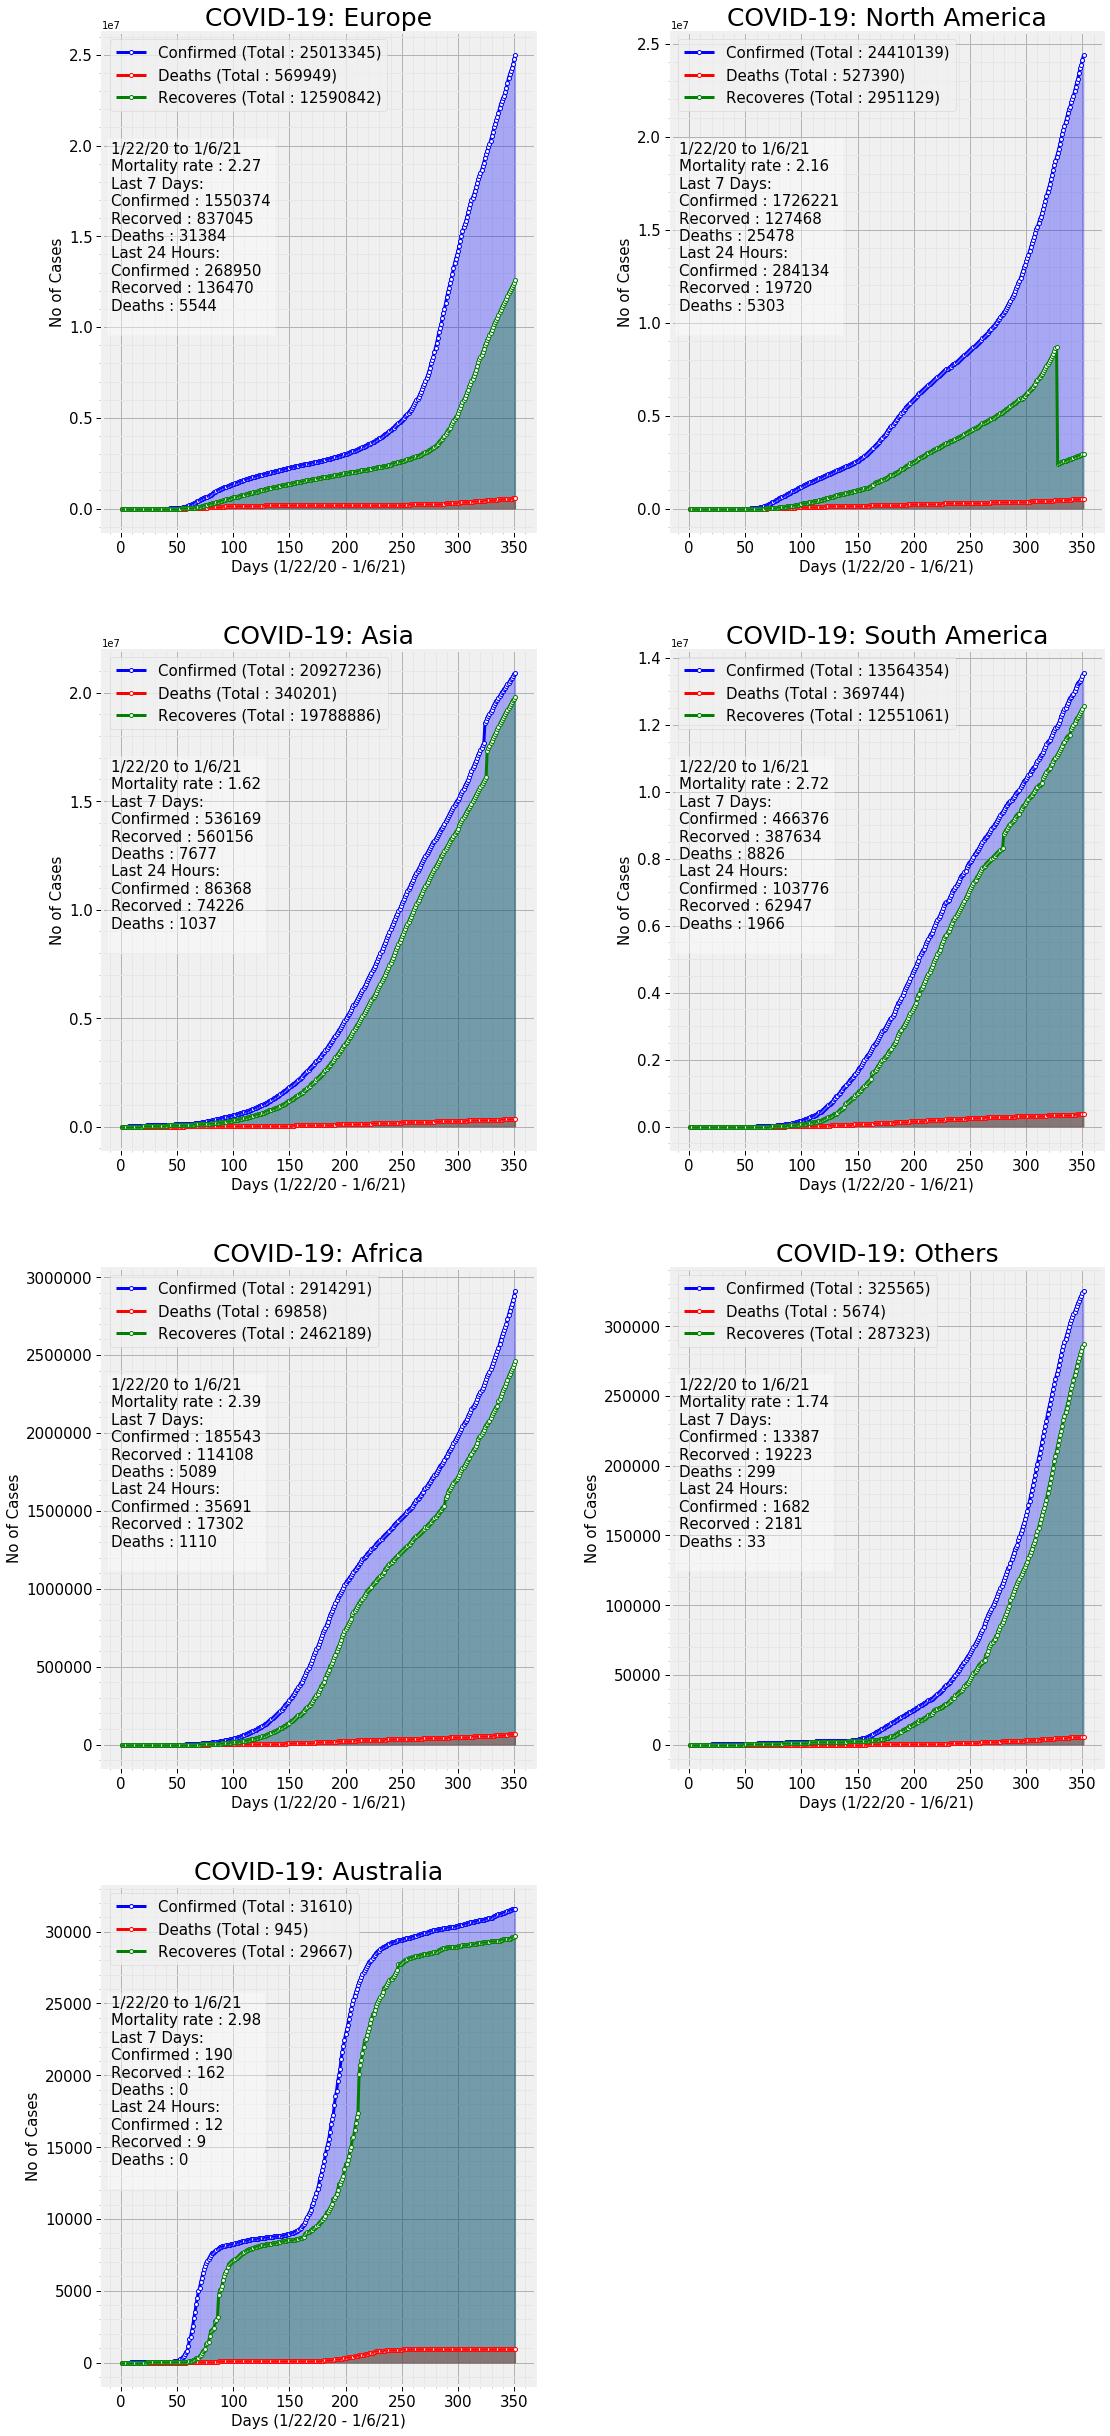

In [24]:
# Insert your code here:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, recovers,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recovers]
    label = ["Confirmed", "Deaths", "Recoveres"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        elif i == 2:
            cases_death = cases.copy()
            cases_recoveries = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
            cases = cases_death + cases_recoveries
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recovers = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recovers = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Recorved : " + str(Total_recovers[-1] - Total_recovers[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Recorved : " + str(Total_recovers[-1] - Total_recovers[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
continents = continents_df.sort_values(continents_df.columns[0],ascending = False).index
#print(continents)
cols =2
rows = int(np.ceil(len(continents)/cols))
f = plt.figure(figsize=(18,9*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(confirmed_df, deaths_df, recoveries_df, continent = continent,figure = [f,rows,cols, i+1])

plt.show()

# Problem 12
    Visualize the covariance matrix for continents_df.

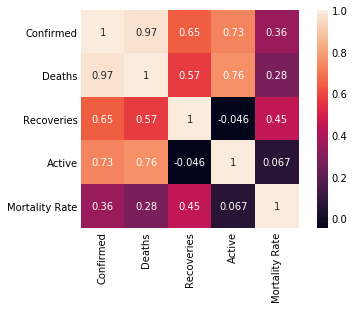

In [25]:
# Insert your code here:
matrix = np.triu(continents_df.corr())
sns.heatmap(continents_df.corr(), annot=True, square = True)

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



<Figure size 1080x2880 with 0 Axes>

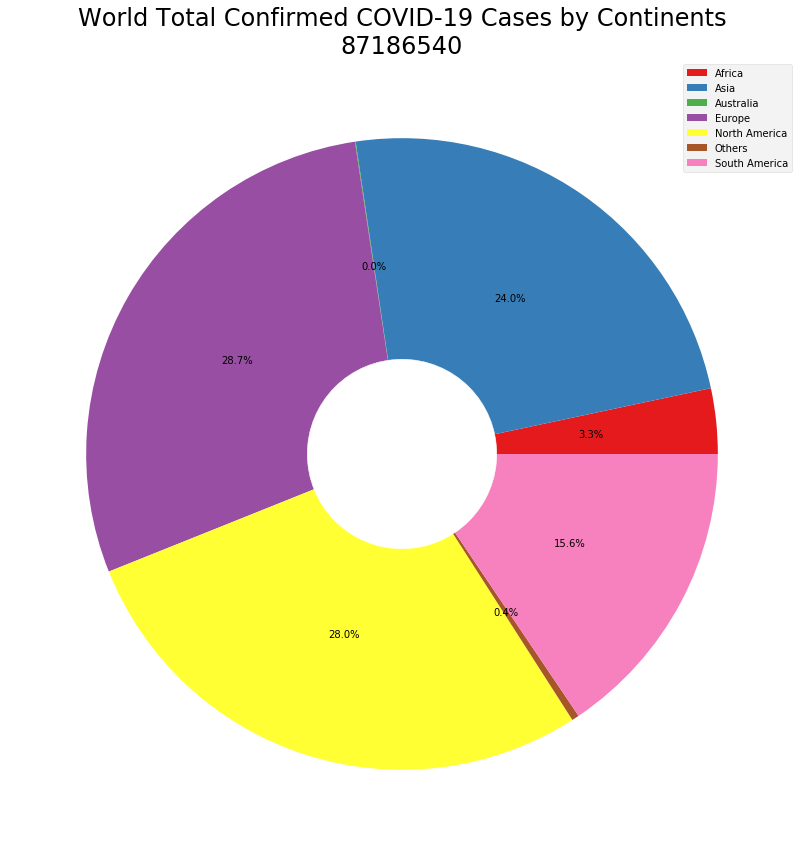

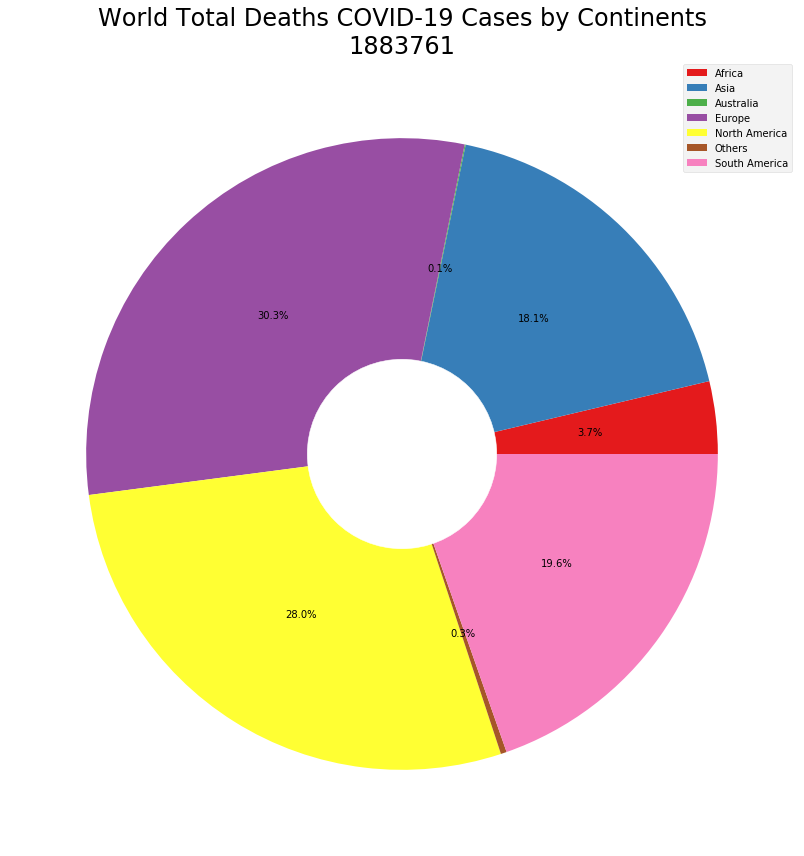

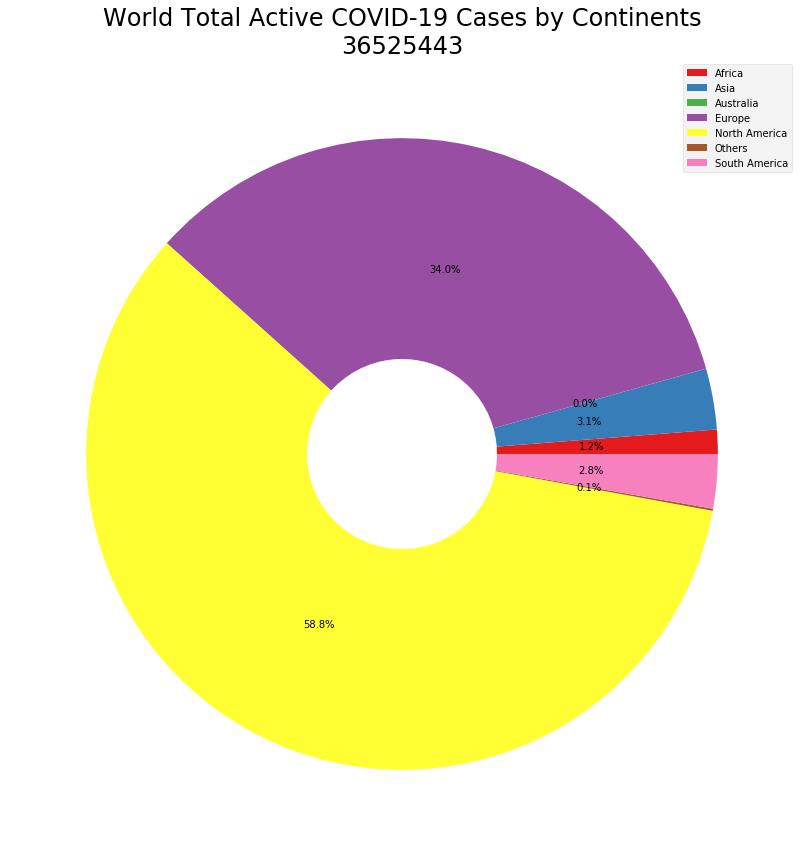

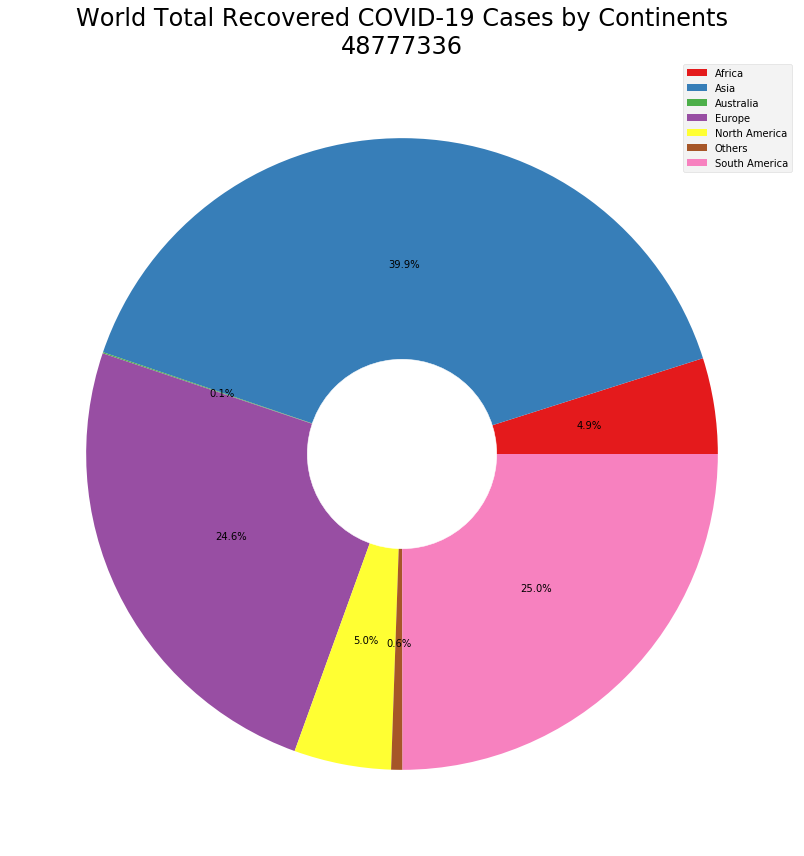

In [26]:
# Insert your code here:
rows = 4
f = plt.figure(figsize=(15,10*rows))
stats = [continents_df.loc[:,['Confirmed']],continents_df.loc[:,['Deaths']],
         continents_df.loc[:,['Active']],continents_df.loc[:,['Recoveries']]]
label = ["Confirmed","Deaths","Active","Recovered"]
labels = list(continents_df.index)
for i, stat in enumerate(stats):
    #colors = ['lightskyblue', 'red', 'blue', 'green', 'gold'] 
    #explode =(0,0.1,0,0.1,0) 
    cs=plt.cm.Set1(np.arange(7)/7.)
    fig, ax1 = plt.subplots(figsize = (24,12)) 
    ax1.pie(stat, autopct='%.1f%%', colors=cs) 
    my_circle=plt.Circle( (0,0), 0.3, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title("World Total "+label[i]+ " COVID-19 Cases by Continents\n"+str(stat.sum().values[0]), fontsize = 24) 
    ax1.legend(labels, loc = "upper right") 
    plt.tight_layout() 

plt.show()


# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [27]:
# Insert your code here:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
index_list = list(countries_df.index)
for i in range(0,len(countries_df)):
    folium.Circle(
        location=[countries_df.iloc[i]['Lat'], countries_df.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+index_list[i]+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(countries_df.iloc[i]['Confirmed'])+"</li>"+
        "<li>Deaths:   "+str(countries_df.iloc[i]['Deaths'])+"</li>" +
        "<li>Recovered:   "+str(countries_df.iloc[i]['Recoveries'])+"</li>" +
        "<li>Mortality Rate:   "+str(np.round(countries_df.iloc[i]['Deaths']/(countries_df.iloc[i]['Confirmed']+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(countries_df.iloc[i]['Confirmed']+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map




# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [31]:
# Insert your code here:
temp_df = pd.DataFrame(countries_df['Active'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="Country/Region",
                    color=np.log10(temp_df["Active"]), # lifeExp is a column of gapminder
                    #hover_name="Country/Region", # column to add to hover information
                    #hover_data=["Active"],
                    #hover_data= 
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Active Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Active Cases(Log Scale)",colorscale="spectral")
# fig.to_image("Global Heat Map confirmed.png")
fig.show()


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log10



# Problem 16
    Filter the top 10 countries baseđ on the number of confirmed cases.

In [29]:
top_10_countries = list(countries_df.sort_values('Confirmed')["Confirmed"].index[-10:][::-1])
top10_countries_df = countries_df.loc[top_10_countries]
top10_countries_df

,Lat,Long,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,,,
USA,40.000000,-100.000000,North America,21299340,361123,0,20938217,1.70
India,20.593684,78.962880,Asia,10395278,150336,10016859,228083,1.45
Brazil,-14.235000,-51.925300,South America,7873830,198974,7033286,641570,2.53
Russia,61.524010,105.318756,Europe,3274615,59137,2657994,557484,1.81
United Kingdom,24.548173,-43.902242,Europe,2845265,77470,6448,2761347,2.72
France,6.425300,-9.839634,Europe,2763116,66699,204679,2491738,2.41
Turkey,38.963700,35.243300,Asia,2283931,22070,2164040,97821,0.97
Italy,41.871940,12.567380,Europe,2201945,76877,1556356,568712,3.49
Spain,40.463667,-3.749220,Europe,1982544,51430,150376,1780738,2.59


# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [30]:
#df_top10_countries = df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:]
y_Deaths = top10_countries_df['Deaths']
y_Recovered = top10_countries_df['Recoveries']
y_Active = top10_countries_df['Active']

Deaths = go.Bar(x = top10_countries_df.index, y=y_Deaths, name="Deaths")
Recovered = go.Bar(x=top10_countries_df.index, y=y_Recovered, name="Recoveries")
Active = go.Bar(x=top10_countries_df.index, y=y_Active, name="Active")

data = [Deaths, Recovered, Active]
layout = go.Layout(barmode='stack', 
    title="Top 10 Countries (Confirmed Cases)",
    yaxis={
        'title': "# active cases",
        'separatethousands': True,
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)